In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('final_.csv')

In [3]:
df.head()

,name,rating,total_rating,reviews,ram,rom,expandable,display,camera,battery,processor,price
0,"REDMI 9i Sport (Metallic Blue, 64 GB)",4.4,"39,048","1,984",4 GB RAM,64 GB ROM,Expandable Upto 512 GB,16.59 cm (6.53 inch) HD+ Display,13MP Rear Camera | 5MP Front Camera,5000 mAh Li-Polymer Battery,MediaTek Helio G25 Processor,"₹8,799"
1,"REDMI 9i Sport (Coral Green, 64 GB)",4.4,"39,048","1,984",4 GB RAM,64 GB ROM,Expandable Upto 512 GB,16.59 cm (6.53 inch) HD+ Display,13MP Rear Camera | 5MP Front Camera,5000 mAh Li-Polymer Battery,MediaTek Helio G25 Processor,"₹8,799"
2,"REDMI 9i Sport (Carbon Black, 64 GB)",4.4,"39,048","1,984",4 GB RAM,64 GB ROM,Expandable Upto 512 GB,16.59 cm (6.53 inch) HD+ Display,13MP Rear Camera | 5MP Front Camera,5000 mAh Li-Polymer Battery,MediaTek Helio G25 Processor,"₹8,799"
3,"realme Narzo 50A (Oxygen Green, 64 GB)",4.4,"2,02,600","12,340",4 GB RAM,64 GB ROM,Expandable Upto 256 GB,16.51 cm (6.5 inch) HD+ Display,50MP + 2MP + 2MP | 8MP Front Camera,6000 mAh Battery,MediaTek Helio G85 Processor,"₹11,499"
4,"realme Narzo 50A (Oxygen Blue, 64 GB)",4.4,"2,02,600","12,340",4 GB RAM,64 GB ROM,Expandable Upto 256 GB,16.51 cm (6.5 inch) HD+ Display,50MP + 2MP + 2MP | 8MP Front Camera,6000 mAh Battery,MediaTek Helio G85 Processor,"₹11,499"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11976 entries, 0 to 11975
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          11976 non-null  object 
 1   rating        10116 non-null  float64
 2   total_rating  10116 non-null  object 
 3   reviews       10116 non-null  object 
 4   ram           11976 non-null  object 
 5   rom           11968 non-null  object 
 6   expandable    3743 non-null   object 
 7   display       11976 non-null  object 
 8   camera        11976 non-null  object 
 9   battery       11976 non-null  object 
 10  processor     11468 non-null  object 
 11  price         11974 non-null  object 
dtypes: float64(1), object(11)
memory usage: 1.1+ MB


In [5]:
df.isnull().sum()

name               0
rating          1860
total_rating    1860
reviews         1860
ram                0
rom                8
expandable      8233
display            0
camera             0
battery            0
processor        508
price              2
dtype: int64

<AxesSubplot:>

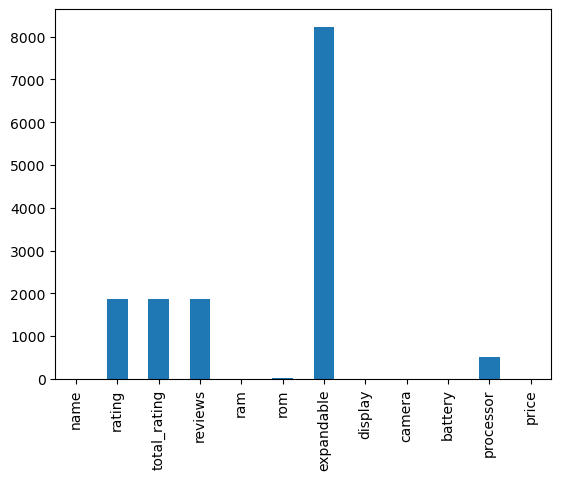

In [6]:
df.isnull().sum().plot(kind='bar')

In [7]:
df.shape

(11976, 12)

In [8]:
df.dropna(subset=['price'],inplace=True)

In [9]:
df.isnull().mean()*100

name             0.000000
rating          15.533656
total_rating    15.533656
reviews         15.533656
ram              0.000000
rom              0.066811
expandable      68.748956
display          0.000000
camera           0.000000
battery          0.000000
processor        4.242525
price            0.000000
dtype: float64

<AxesSubplot:>

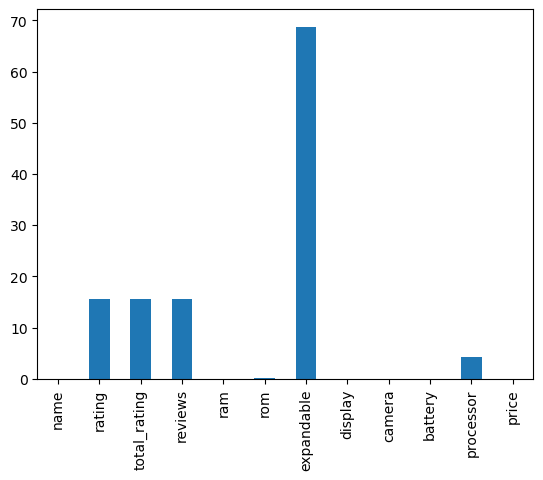

In [10]:
(df.isnull().mean()*100).plot(kind='bar')

In [11]:
df['price'] = df['price'].str[1:]
df['price'] = df['price'].replace('[\,,\.]', '', regex=True).astype(int)

In [12]:
df['price'].head()

0     8799
1     8799
2     8799
3    11499
4    11499
Name: price, dtype: int64

In [13]:
df['price'].sum()

206886361

In [94]:
df['name'].value_counts().head(10).reset_index()

,index,name
0,MTR M4,918
1,Ecotel E16,476
2,Kechaoda A32,462
3,MTR M1300,461
4,Itel IT2173,461
5,MU M5000,461
6,"realme GT Master Edition (Daybreak Blue, 128 GB)",460
7,"Tecno Spark Go 2020 (Ice jadeite, 32 GB)",459
8,"APPLE iPhone 13 Pro (Graphite, 128 GB)",459
9,Nuvo FLASH,459


<BarContainer object of 10 artists>

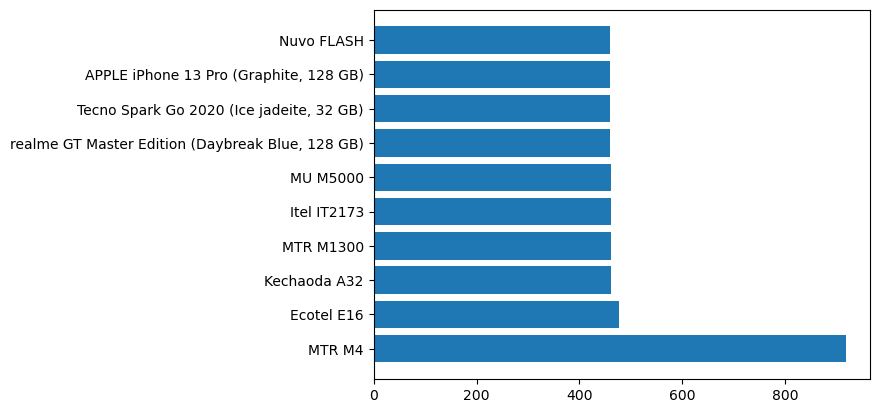

In [96]:
x = df['name'].value_counts().head(10).reset_index().rename(columns={'index':'name','name':'count'})
plt.barh(x['name'],x['count'])

<AxesSubplot:ylabel='name'>

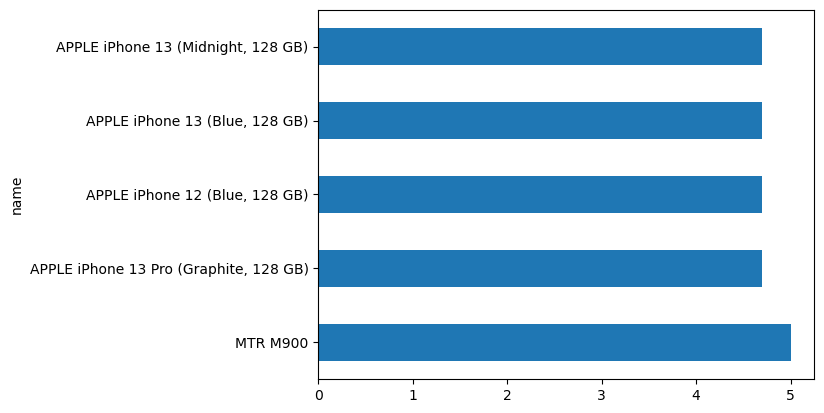

In [103]:
df.groupby('name')['rating'].mean().sort_values(ascending=False).head().plot(kind='barh')